In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import time as time
from lib.simubot import hom, loc,simubot
from lib.dibrobot import dibrobot
from lib.utils import c2m, polares

In [ ]:
def escenario():
   # Escenario
    plt.vlines(0, 0, 3.2, colors='k',lw=1.5)
    plt.vlines(1.2, 0.8, 3.2, colors='k',lw=1.5)
    plt.vlines(2.8, 0, 3.2, colors='k',lw=1.5)
    plt.hlines(0, 0, 2.8, colors='k',lw=1.5)
    plt.hlines(3.2, 0, 0.4, colors='k',lw=1.5)
    plt.hlines(3.2, 0.8, 1.2, colors='k',lw=1.5)
    plt.hlines(3.2, 1.6, 2.4, colors='k',lw=1.5)
    plt.hlines(1.2, 1.6, 2.4, colors='k',lw=1.5)
    # Grid
    plt.hlines(0.4, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(0.8, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(1.2, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(1.6, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(2.0, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(2.4, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(2.8, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.hlines(3.2, 0, 2.8, colors='k',ls='--',lw=0.5)
    plt.vlines(0.4, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(0.8, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(1.2, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(1.6, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(2, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(2.4, 0, 3.2, colors='k',ls='--',lw=0.5)
    plt.vlines(2.8, 0, 3.2, colors='k',ls='--',lw=0.5)
    # Cuadros
    plt.vlines(0, 1.4, 1.8, colors='b',lw=4)
    plt.hlines(0, 0.4, 0.8, colors='b',lw=4)
    plt.hlines(3.2, 1.8, 2.2, colors='b',lw=4)

    plt.gca().set_aspect('equal', adjustable='box')


def dibrobotesc(loc):
    escenario()
    dibrobot(loc)


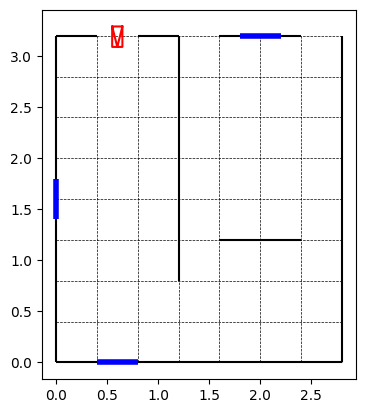

In [3]:
dibrobotesc([0.6, 3.2, -np.pi/2])

In [ ]:
def control_de_pose(pasos, distancia, angulo, wXrInicial=[0,0,0]):
    wXr = wXrInicial
    kp, ka, kb = 0.2, 0.8, 0.4
    T = 0.25
    K = [[kp,0,0],[0,ka,kb]]
    i = 0

    for paso in pasos:
        while True:
            if paso[0] == 'c':
                wXg = [paso[1], paso[2], paso[3]]
                gXr = loc(np.dot(hom(wXg),hom(wXr)))

                gPr = polares(gXr[0], gXr[1], gXr[2])

                [v,w]= np.dot(K, gPr)

                wXr2 = simubot([v,w], wXr, T)
                dibrobot(wXr2)

                if i > 50:
                    escenario()
                    plt.show()
                    i = 0
                else:
                    i += 1

                if gPr[0] < distancia and np.abs(gPr[2]) < np.deg2rad(angulo):
                    wXr = wXr2
                    break

                wXr = wXr2
            else:
                break

    escenario()
    

    
control_de_pose(pasos=[
        ['c',0, c2m(4), -np.pi],
        ['c',c2m(1.5), 0, -np.pi/2],
        ['p', c2m(3.5), c2m(3), np.pi/2],
        ['c',c2m(5), c2m(8), np.pi/2],
        ['p', c2m(3.5), c2m(8), np.pi/2]
    ],
    distancia=c2m(2),
    angulo=3,
    wXrInicial=[0.6, 3.2, -np.pi/2]
)